#📌 Extracão

##Funçao para extrair e normalizar

In [1]:
import requests
import pandas as pd
from pandas import json_normalize

def extrair_e_normalizar_json(url):
    """
    Extrai dados de um JSON hospedado em uma URL e normaliza em um DataFrame plano.

    Parâmetros:
        url (str): URL do arquivo JSON.

    Retorna:
        pd.DataFrame: DataFrame normalizado com colunas planas.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df_normalizado = json_normalize(data)
        return df_normalizado
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e}")
        return pd.DataFrame()
    except ValueError as e:
        print(f"Erro ao decodificar JSON: {e}")
        return pd.DataFrame()

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df_normalizado = extrair_e_normalizar_json(url)

print(f"DataFrame com {df_normalizado.shape[0]} linhas e {df_normalizado.shape[1]} colunas.")
print("Colunas disponíveis:")
for col in df_normalizado.columns:
    print(f" - {col}")

DataFrame com 7267 linhas e 21 colunas.
Colunas disponíveis:
 - customerID
 - Churn
 - customer.gender
 - customer.SeniorCitizen
 - customer.Partner
 - customer.Dependents
 - customer.tenure
 - phone.PhoneService
 - phone.MultipleLines
 - internet.InternetService
 - internet.OnlineSecurity
 - internet.OnlineBackup
 - internet.DeviceProtection
 - internet.TechSupport
 - internet.StreamingTV
 - internet.StreamingMovies
 - account.Contract
 - account.PaperlessBilling
 - account.PaymentMethod
 - account.Charges.Monthly
 - account.Charges.Total


**Dicionário de dados**
*   customerID: número de identificação único de cada cliente
*   Churn: se o cliente deixou ou não a empresa
*   gender: gênero (masculino e feminino)
*   SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
*   Partner: se o cliente possui ou não um parceiro ou parceira
*   Dependents: se o cliente possui ou não dependentes
*   tenure: meses de contrato do cliente
*   PhoneService: assinatura de serviço telefônico
*   MultipleLines: assisnatura de mais de uma linha de telefone
*   InternetService: assinatura de um provedor internet
*   OnlineSecurity: assinatura adicional de segurança online
*   OnlineBackup: assinatura adicional de backup online
*   DeviceProtection: assinatura adicional de proteção no dispositivo
*   TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
*   StreamingTV: assinatura de TV a cabo
*   StreamingMovies: assinatura de streaming de filmes
*   Contract: tipo de contrato
*   PaperlessBilling: se o cliente prefere receber online a fatura
*   PaymentMethod: forma de pagamento
*   Charges.Monthly: total de todos os serviços do cliente por mês
*   Charges.Total: total gasto pelo cliente

#🔧 Transformação

###Renomear colunas e traduzir

In [3]:
df_normalizado.rename(columns={
    'customer.gender': 'Gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'Tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
}, inplace=True)

In [4]:
df_normalizado.rename(columns={
    'Gender': 'Gênero',
    'SeniorCitizen': 'Tem65AnosOuMais',
    'Partner': 'TemParceiro',
    'Dependents': 'Dependentes',
    'Tenure': 'MesesContrato',
    'PhoneService': 'ServiçoTelefone',
    'MultipleLines': 'MultiplasLinhas',
    'InternetService': 'ServiçoInternet',
    'OnlineSecurity': 'SegurançaOnline',
    'OnlineBackup': 'BackupOnline',
    'DeviceProtection': 'ProteçãoDispositivo',
    'TechSupport': 'SuporteTecnico',
    'StreamingTV': 'TVStreaming',
    'StreamingMovies': 'FilmesStreaming',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FaturaDigital',
    'PaymentMethod': 'FormaPagamento',
    'MonthlyCharges': 'CobrançaMensal',
    'TotalCharges': 'CobrançaTotal'
}, inplace=True)

In [5]:
print(df_normalizado.columns)

Index(['customerID', 'Churn', 'Gênero', 'Tem65AnosOuMais', 'TemParceiro',
       'Dependentes', 'MesesContrato', 'ServiçoTelefone', 'MultiplasLinhas',
       'ServiçoInternet', 'SegurançaOnline', 'BackupOnline',
       'ProteçãoDispositivo', 'SuporteTecnico', 'TVStreaming',
       'FilmesStreaming', 'TipoContrato', 'FaturaDigital', 'FormaPagamento',
       'CobrançaMensal', 'CobrançaTotal'],
      dtype='object')


###salvando o dataframe

In [6]:
df_limpo = df_normalizado.copy()

In [7]:
df_normalizado.head()

,customerID,Churn,Gênero,Tem65AnosOuMais,TemParceiro,Dependentes,MesesContrato,ServiçoTelefone,MultiplasLinhas,ServiçoInternet,...,BackupOnline,ProteçãoDispositivo,SuporteTecnico,TVStreaming,FilmesStreaming,TipoContrato,FaturaDigital,FormaPagamento,CobrançaMensal,CobrançaTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###Verificando se há problemas nos dados- valores ausentes, duplicados, erros de formatação e inconsistências nas categorias.
Duplicados
Vazios
nulos
Tipos de dados
Valores atípicos
Consistencia e validez de dados categoricos
Normalização de textos

In [8]:
# Verifique se há valores únicos em cada coluna
for col in df_normalizado.columns:
    print(f"\n🔍 Coluna: '{col}'")
    print(f"→ Valores únicos: {df_normalizado[col].nunique()}")
if df_normalizado[col].nunique() < 50: # Imprima os valores somente se não houver muitos
  print("→ Valores encontrados:")
  print(df_normalizado[col].unique())
  print('-' * 50)  # Linha divisória para melhor visualização


🔍 Coluna: 'customerID'
→ Valores únicos: 7267

🔍 Coluna: 'Churn'
→ Valores únicos: 3

🔍 Coluna: 'Gênero'
→ Valores únicos: 2

🔍 Coluna: 'Tem65AnosOuMais'
→ Valores únicos: 2

🔍 Coluna: 'TemParceiro'
→ Valores únicos: 2

🔍 Coluna: 'Dependentes'
→ Valores únicos: 2

🔍 Coluna: 'MesesContrato'
→ Valores únicos: 73

🔍 Coluna: 'ServiçoTelefone'
→ Valores únicos: 2

🔍 Coluna: 'MultiplasLinhas'
→ Valores únicos: 3

🔍 Coluna: 'ServiçoInternet'
→ Valores únicos: 3

🔍 Coluna: 'SegurançaOnline'
→ Valores únicos: 3

🔍 Coluna: 'BackupOnline'
→ Valores únicos: 3

🔍 Coluna: 'ProteçãoDispositivo'
→ Valores únicos: 3

🔍 Coluna: 'SuporteTecnico'
→ Valores únicos: 3

🔍 Coluna: 'TVStreaming'
→ Valores únicos: 3

🔍 Coluna: 'FilmesStreaming'
→ Valores únicos: 3

🔍 Coluna: 'TipoContrato'
→ Valores únicos: 3

🔍 Coluna: 'FaturaDigital'
→ Valores únicos: 2

🔍 Coluna: 'FormaPagamento'
→ Valores únicos: 4

🔍 Coluna: 'CobrançaMensal'
→ Valores únicos: 1585

🔍 Coluna: 'CobrançaTotal'
→ Valores únicos: 6531


####Verificando se há dados duplicados

In [9]:
# Verificando se tem duplicados
duplicados = df_normalizado.duplicated().sum()
print(f"Numero de linhas duplicadas: {duplicados}")

Numero de linhas duplicadas: 0


###Verificando valores nulos

In [10]:
# Verificando se tem Nulos
valores_nulos = df_normalizado.isnull().sum()
print("\nValores nulos por coluna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por coluna:
Series([], dtype: int64)


####Verificando valores brancos ou vazios

In [11]:
valores_en_branco_ou_vazio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores em branco ou string vazias por columna:")
print(valores_en_branco_ou_vazio[valores_en_branco_ou_vazio > 0])


Valores em branco ou string vazias por columna:
Churn            224
CobrançaTotal     11
dtype: int64


####Verificando os tipos de dados

In [12]:
# Eliminando as colunas em branco ou vazias de Churn
if 'Churn' in df_normalizado.columns:
  df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de filas depois de eliminar vazias'Churn':", len(df_normalizado))

Número de filas depois de eliminar vazias'Churn': 7043


Transformando os valores de churn para boolean

In [13]:
df_normalizado['Churn'] = df_normalizado['Churn'].map({'Yes': True, 'No': False})
df_normalizado['Churn'] = df_normalizado['Churn'].astype(bool)
df_normalizado['Churn'].value_counts()

,count
Churn,
False,5174
True,1869


###Relatório de qualidade de dados

In [14]:
def relatorio_qualidade(df):
    print("🔎 Relatório de Qualidade dos Dados")
    print(f"→ Total de linhas: {df.shape[0]}")
    print(f"→ Total de colunas: {df.shape[1]}")
    print("\n→ Valores nulos por coluna:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    print("\n→ Valores em branco por coluna:")
    print(df.apply(lambda x: x.astype(str).str.strip() == '').sum()[lambda s: s > 0])
    print("\n→ Linhas duplicadas:", df.duplicated().sum())

In [15]:
relatorio_qualidade(df_normalizado)

🔎 Relatório de Qualidade dos Dados
→ Total de linhas: 7043
→ Total de colunas: 21

→ Valores nulos por coluna:
Series([], dtype: int64)

→ Valores em branco por coluna:
CobrançaTotal    11
dtype: int64

→ Linhas duplicadas: 0


In [16]:
valores_invalidos = df_normalizado[pd.to_numeric(df_normalizado['CobrançaTotal'], errors='coerce').isnull()]
print("\nExemplos de valores inválidos em 'CobrançaTotal':")
print(valores_invalidos[['CobrançaTotal']].head())


Exemplos de valores inválidos em 'CobrançaTotal':
     CobrançaTotal
975               
1775              
1955              
2075              
2232              


####Convertendo a coluna CobrançaTotal

In [17]:
#Alterando a coluna "CobrançaTotal" para Float

df_normalizado['CobrançaTotal'] = pd.to_numeric(df_normalizado['CobrançaTotal'], errors='coerce')
print(df_normalizado['CobrançaTotal'].dtype)

float64


Os 11 valores vazios ou nulos em Cobranca total sao de clientes novos com menos de um mes de contrato
-- colocar no relatorio-- print("📌 Observação sobre valores nulos em 'CobrançaTotal':")
print("→ Foram encontrados 11 valores nulos na coluna 'CobrançaTotal'.")
print("→ Esses casos correspondem a clientes com menos de um mês de contrato.")
print("→ Como ainda não houve faturamento, o valor total de cobrança não foi gerado.")
print("→ Os valores foram mantidos como NaN para preservar a lógica de negócio.")

In [18]:
nulos_cobranca = df_normalizado['CobrançaTotal'].isnull().sum()
print(f"Valores nulos em 'CobrançaTotal' após conversão: {nulos_cobranca}")

Valores nulos em 'CobrançaTotal' após conversão: 11


In [19]:
print(df_normalizado.dtypes)

customerID              object
Churn                     bool
Gênero                  object
Tem65AnosOuMais          int64
TemParceiro             object
Dependentes             object
MesesContrato            int64
ServiçoTelefone         object
MultiplasLinhas         object
ServiçoInternet         object
SegurançaOnline         object
BackupOnline            object
ProteçãoDispositivo     object
SuporteTecnico          object
TVStreaming             object
FilmesStreaming         object
TipoContrato            object
FaturaDigital           object
FormaPagamento          object
CobrançaMensal         float64
CobrançaTotal          float64
dtype: object


###Tratando Redudancias

“Clientes sem serviço de internet tiveram os campos relacionados a funcionalidades online substituídos por ‘Not Applicable’. Além disso, os valores foram padronizados para garantir consistência textual.”


In [20]:
import numpy as np

#lista de colunas que depedem do serviço de internet

internet_cols =[
    'SegurançaOnline',
    'BackupOnline',
    'ProteçãoDispositivo',
    'SuporteTecnico',
    'TVStreaming',
    'FilmesStreaming'
]
# Substituir valores em clientes sem internet
df_normalizado.loc[df_normalizado['ServiçoInternet'] == 'No', internet_cols] = 'Not applicable'
df_normalizado[internet_cols] = df_normalizado[internet_cols].apply(lambda x: x.str.strip().str.title())
df_normalizado.head()

,customerID,Churn,Gênero,Tem65AnosOuMais,TemParceiro,Dependentes,MesesContrato,ServiçoTelefone,MultiplasLinhas,ServiçoInternet,...,BackupOnline,ProteçãoDispositivo,SuporteTecnico,TVStreaming,FilmesStreaming,TipoContrato,FaturaDigital,FormaPagamento,CobrançaMensal,CobrançaTotal
0,0002-ORFBO,False,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


####Padronizar valores textuais das colunas para boolean: TemParceiro, Dependentes, ServiçoTelefone, MultiplasLinhas e FaturaDigital

In [21]:
binarias = [
    'TemParceiro',
    'Dependentes',
    'ServiçoTelefone',
    'MultiplasLinhas',
    'FaturaDigital'

]

for col in binarias:
    if col in df_normalizado.columns:
        df_normalizado[col] = df_normalizado[col].map({'Yes': True, 'No': False})
        df_normalizado[col] = df_normalizado[col].astype(bool)
    else:
        print(f"⚠️ Coluna não encontrada: {col}")

for col in binarias:
    if col in df_normalizado.columns:
        print(f"{col} → {df_normalizado[col].unique()}")

TemParceiro → [ True False]
Dependentes → [ True False]
ServiçoTelefone → [ True False]
MultiplasLinhas → [False  True]
FaturaDigital → [ True False]


####Criando uma coluna nova de gastos diarios com o serviço

In [22]:
# Calculando os gastos diários
df_normalizado['CobrançaDia'] = df_normalizado.apply(
    lambda row: round(row['CobrançaTotal'] / row['MesesContrato'] / 30, 2) if row['MesesContrato'] > 0 else np.nan,
    axis=1
)
# Inserindo a coluna na posição 19
df_normalizado.insert(19, 'CobrançaDia', df_normalizado.pop('CobrançaDia'))

In [23]:
df_normalizado = df_normalizado.drop('CobrançaDia', errors='ignore')

In [24]:
df_normalizado

,customerID,Churn,Gênero,Tem65AnosOuMais,TemParceiro,Dependentes,MesesContrato,ServiçoTelefone,MultiplasLinhas,ServiçoInternet,...,ProteçãoDispositivo,SuporteTecnico,TVStreaming,FilmesStreaming,TipoContrato,FaturaDigital,FormaPagamento,CobrançaDia,CobrançaMensal,CobrançaTotal
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,0,False,False,13,True,False,DSL,...,No,Yes,No,No,One year,False,Mailed check,1.90,55.15,742.90
7263,9992-RRAMN,True,Male,0,True,False,22,True,True,Fiber optic,...,No,No,No,Yes,Month-to-month,True,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,False,Male,0,False,False,2,True,False,DSL,...,No,No,No,No,Month-to-month,True,Mailed check,1.55,50.30,92.75
7265,9993-LHIEB,False,Male,0,True,True,67,True,False,DSL,...,Yes,Yes,No,Yes,Two year,False,Mailed check,2.30,67.85,4627.65


In [25]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   Churn                7043 non-null   bool   
 2   Gênero               7043 non-null   object 
 3   Tem65AnosOuMais      7043 non-null   int64  
 4   TemParceiro          7043 non-null   bool   
 5   Dependentes          7043 non-null   bool   
 6   MesesContrato        7043 non-null   int64  
 7   ServiçoTelefone      7043 non-null   bool   
 8   MultiplasLinhas      7043 non-null   bool   
 9   ServiçoInternet      7043 non-null   object 
 10  SegurançaOnline      7043 non-null   object 
 11  BackupOnline         7043 non-null   object 
 12  ProteçãoDispositivo  7043 non-null   object 
 13  SuporteTecnico       7043 non-null   object 
 14  TVStreaming          7043 non-null   object 
 15  FilmesStreaming      7043 non-null   object

####“Foi criada uma função personalizada para traduzir os valores do DataFrame para o português, padronizando termos técnicos e booleanos. Essa etapa visa facilitar a interpretação dos dados por usuários finais e garantir consistência textual.

###Função para traduzir os dados do Dataframe

In [26]:
def traduzir_valores(df):
    # Dicionários de tradução
    genero_map = {
        'Female': 'Feminino',
        'Male': 'Masculino'
    }

    churn_map = {
        True: 'Saiu',
        False: 'Permaneceu',
        'True': 'Saiu',
        'False': 'Permaneceu'
    }

    boolean_map = {
        True: 'Sim',
        False: 'Não',
        'Yes': 'Sim',
        'No': 'Não',
        'TRUE': 'Sim',
        'FALSE': 'Não',
        'True': 'Sim',
        'False': 'Não'
    }

    internet_map = {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra óptica',
        'No': 'Não'
    }

    servicos_map = {
        'Yes': 'Sim',
        'No': 'Não',
        'Not applicable': 'Não aplicável'
    }

    contrato_map = {
        'Month-to-month': 'Mensal',
        'One year': 'Anual',
        'Two year': 'Bienal'
    }

    pagamento_map = {
        'Mailed check': 'Cheque enviado',
        'Electronic check': 'Cheque eletrônico',
        'Bank transfer (automatic)': 'Transferência bancária',
        'Credit card (automatic)': 'Cartão de crédito'
    }

    # Aplicar traduções
    colunas_replace = {
        'Gênero': genero_map,
        'Churn': churn_map,
        'ServiçoInternet': internet_map,
        'TipoContrato': contrato_map,
        'FormaPagamento': pagamento_map
    }

    for col, mapa in colunas_replace.items():
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().replace(mapa)

    # Traduzir colunas booleanas
    booleanas = [
        'TemParceiro', 'Dependentes', 'ServiçoTelefone',
        'MultiplasLinhas', 'FaturaDigital'
    ]
    for col in booleanas:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().replace(boolean_map)

    # Traduzir serviços adicionais
    servicos = [
        'SegurançaOnline', 'BackupOnline', 'ProteçãoDispositivo',
        'SuporteTecnico', 'TVStreaming', 'FilmesStreaming'
    ]
    for col in servicos:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().replace(servicos_map)

    return df

In [27]:
df_traduzido = traduzir_valores(df_normalizado.copy())

###Salvando o Dataframe tradado

In [28]:
df_traduzido.to_csv('df_tratado.csv', index=False, encoding='utf-8')
df_verificacao= pd.read_csv('df_tratado.csv')
df_verificacao.head(30)

,customerID,Churn,Gênero,Tem65AnosOuMais,TemParceiro,Dependentes,MesesContrato,ServiçoTelefone,MultiplasLinhas,ServiçoInternet,...,ProteçãoDispositivo,SuporteTecnico,TVStreaming,FilmesStreaming,TipoContrato,FaturaDigital,FormaPagamento,CobrançaDia,CobrançaMensal,CobrançaTotal
0,0002-ORFBO,Permaneceu,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,2.20,65.60,593.30
1,0003-MKNFE,Permaneceu,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,2.01,59.90,542.40
2,0004-TLHLJ,Saiu,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,2.34,73.90,280.85
3,0011-IGKFF,Saiu,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.17,98.00,1237.85
4,0013-EXCHZ,Saiu,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,2.97,83.90,267.40
5,0013-MHZWF,Permaneceu,Feminino,0,Não,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Sim,Mensal,Sim,Cartão de crédito,2.12,69.40,571.45
6,0013-SMEOE,Permaneceu,Feminino,1,Sim,Não,71,Sim,Não,Fibra óptica,...,Sim,Sim,Sim,Sim,Bienal,Sim,Transferência bancária,3.71,109.70,7904.25
7,0014-BMAQU,Permaneceu,Masculino,0,Sim,Não,63,Sim,Sim,Fibra óptica,...,Não,Sim,Não,Não,Bienal,Sim,Cartão de crédito,2.85,84.65,5377.80
8,0015-UOCOJ,Permaneceu,Feminino,1,Não,Não,7,Sim,Não,DSL,...,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico,1.62,48.20,340.35
9,0016-QLJIS,Permaneceu,Feminino,0,Sim,Sim,65,Sim,Sim,DSL,...,Sim,Sim,Sim,Sim,Bienal,Sim,Cheque enviado,3.06,90.45,5957.90


#📊 Carga e análise

###Analise descritiva: estatísticas para colunas numéricas e categóricas.

In [29]:
df_normalizado.select_dtypes(include=['float', 'int']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tem65AnosOuMais,7043.0,0.162147,0.368612,0.00,0.0000,0.000,0.0000,1.00
MesesContrato,7043.0,32.371149,24.559481,0.00,9.0000,29.000,55.0000,72.00
CobrançaDia,7032.0,2.159892,1.006217,0.46,1.2075,2.350,3.0100,4.05
CobrançaMensal,7043.0,64.761692,30.090047,18.25,35.5000,70.350,89.8500,118.75
CobrançaTotal,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [30]:
df_normalizado.select_dtypes(include='bool').astype(int).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.0,0.0,0.0,1.0,1.0
TemParceiro,7043.0,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependentes,7043.0,0.299588,0.458110,0.0,0.0,0.0,1.0,1.0
ServiçoTelefone,7043.0,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
MultiplasLinhas,7043.0,0.518671,0.499687,0.0,0.0,1.0,1.0,1.0
FaturaDigital,7043.0,0.592219,0.491457,0.0,0.0,1.0,1.0,1.0


In [31]:
df_traduzido.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tem65AnosOuMais,7043.0,0.162147,0.368612,0.00,0.0000,0.000,0.0000,1.00
MesesContrato,7043.0,32.371149,24.559481,0.00,9.0000,29.000,55.0000,72.00
CobrançaDia,7032.0,2.159892,1.006217,0.46,1.2075,2.350,3.0100,4.05
CobrançaMensal,7043.0,64.761692,30.090047,18.25,35.5000,70.350,89.8500,118.75
CobrançaTotal,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [32]:
df_normalizado.describe(include='object').transpose()

,count,unique,top,freq
customerID,7043,7043,9995-HOTOH,1
Gênero,7043,2,Male,3555
ServiçoInternet,7043,3,Fiber optic,3096
SegurançaOnline,7043,3,No,3498
BackupOnline,7043,3,No,3088
ProteçãoDispositivo,7043,3,No,3095
SuporteTecnico,7043,3,No,3473
TVStreaming,7043,3,No,2810
FilmesStreaming,7043,3,No,2785
TipoContrato,7043,3,Month-to-month,3875


###Distribuição de Churn

/tmp/ipython-input-2127116133.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


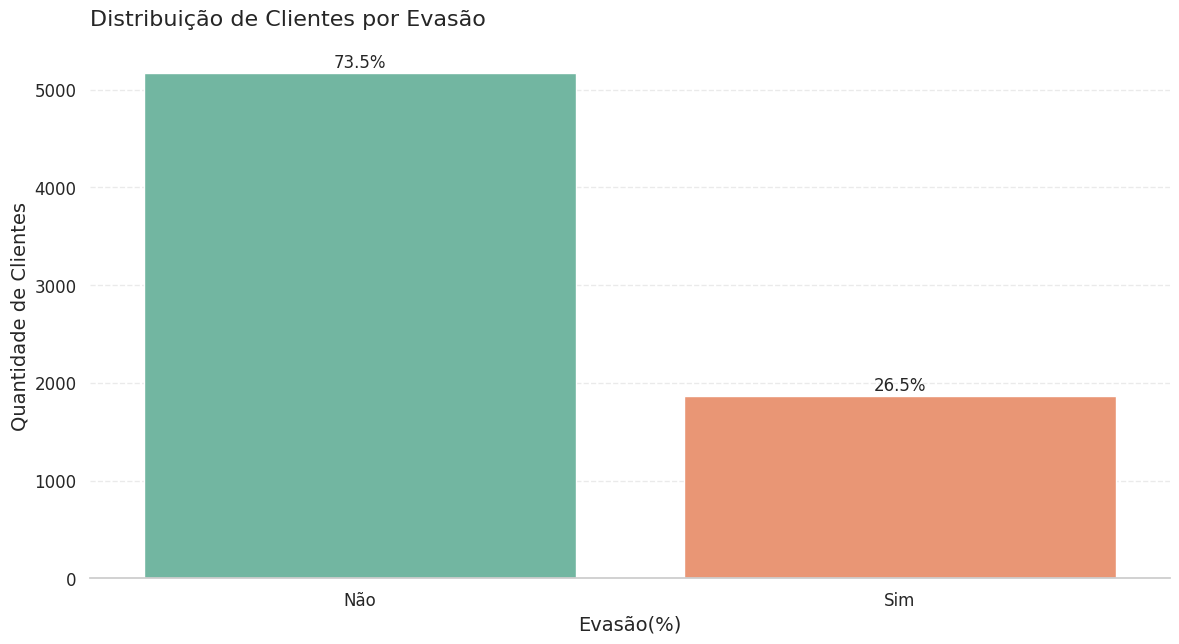

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total de clientes
total = len(df_normalizado)

# Mapeando os valores diretamente para o gráfico
churn_mapeado = df_normalizado['Churn'].map({True: 'Sim', False: 'Não'})
churn_counts = churn_mapeado.value_counts()
percentuais = churn_counts / total * 100

# Estilo e tamanho do gráfico
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))

# Gráfico de barras
sns.countplot(
    x=churn_mapeado,
    palette=['#66c2a5', '#fc8d62'],
    order=['Não', 'Sim'],
    ax=ax
)

# Adicionando os percentuais acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 50,
        f'{(height / total) * 100:.1f}%',
        ha='center',
        fontsize=12
    )

# Ajustes visuais
ax.set_ylim(0, churn_counts.max() + 200)
ax.set_title('Distribuição de Clientes por Evasão', fontsize=16, loc='left', pad=20)
ax.set_xlabel('Evasão(%)', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remover bordas e adicionar linhas tracejadas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Ajustar margens
plt.subplots_adjust(left=0.08, right=0.98, top=0.90, bottom=0.15)

plt.show()

###Contagem de evasão por Variáveis Categóricas

###Evasao por genero, tipo de contrato, metodo pagamento

In [34]:
df_normalizado.groupby('Gênero')['Churn'].value_counts()
df_normalizado.groupby('TipoContrato')['Churn'].value_counts()
df_normalizado.groupby('FormaPagamento')['Churn'].value_counts()

FormaPagamento             Churn
Bank transfer (automatic)  False    1286
                           True      258
Credit card (automatic)    False    1290
                           True      232
Electronic check           False    1294
                           True     1071
Mailed check               False    1304
                           True      308
Name: count, dtype: int64

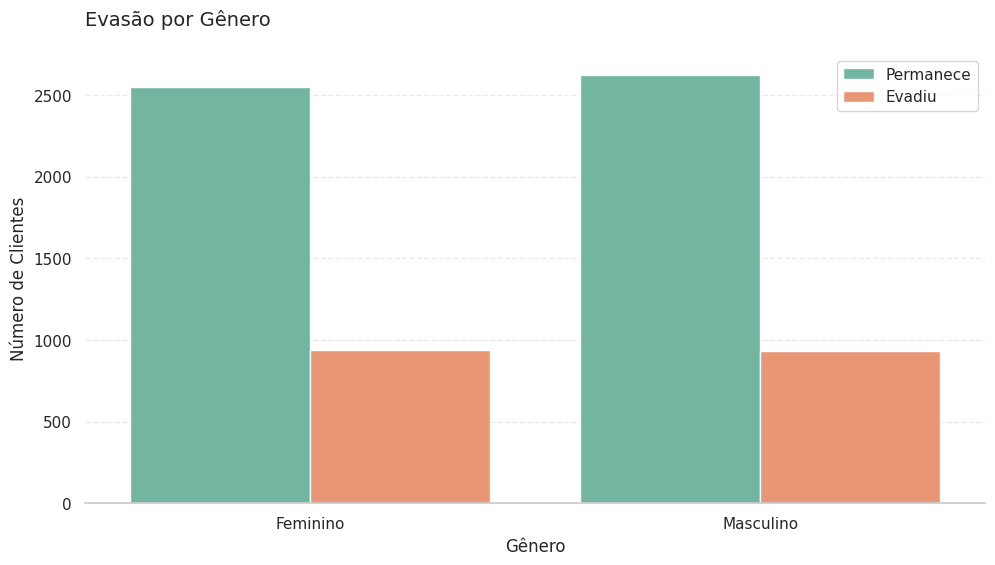

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo e figura
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico
sns.countplot(
    data=df_traduzido,
    x='Gênero',
    hue='Churn',
    palette=['#66c2a5', '#fc8d62'],
    ax=ax
)

# Título e eixos
ax.set_title('Evasão por Gênero', fontsize=14, loc='left', pad=20)
ax.set_xlabel('Gênero', fontsize=12)
ax.set_ylabel('Número de Clientes', fontsize=12)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

# Remover bordas e adicionar linhas tracejadas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Ajustar legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Permanece', 'Evadiu'], title=None, loc='upper right')

# Ajustar margens
plt.subplots_adjust(left=0.08, right=0.98, top=0.90, bottom=0.15)

plt.show()

In [36]:
print(df_traduzido['Tem65AnosOuMais'].unique())

[0 1]


In [37]:
# Descobrir o maior número de clientes em qualquer categoria
max_count = max(
    df_traduzido['Gênero'].value_counts().max(),
    df_traduzido['Tem65AnosOuMais'].value_counts().max(),
    df_traduzido['TemParceiro'].value_counts().max(),
    df_traduzido['Dependentes'].value_counts().max()
)
max_count

5901

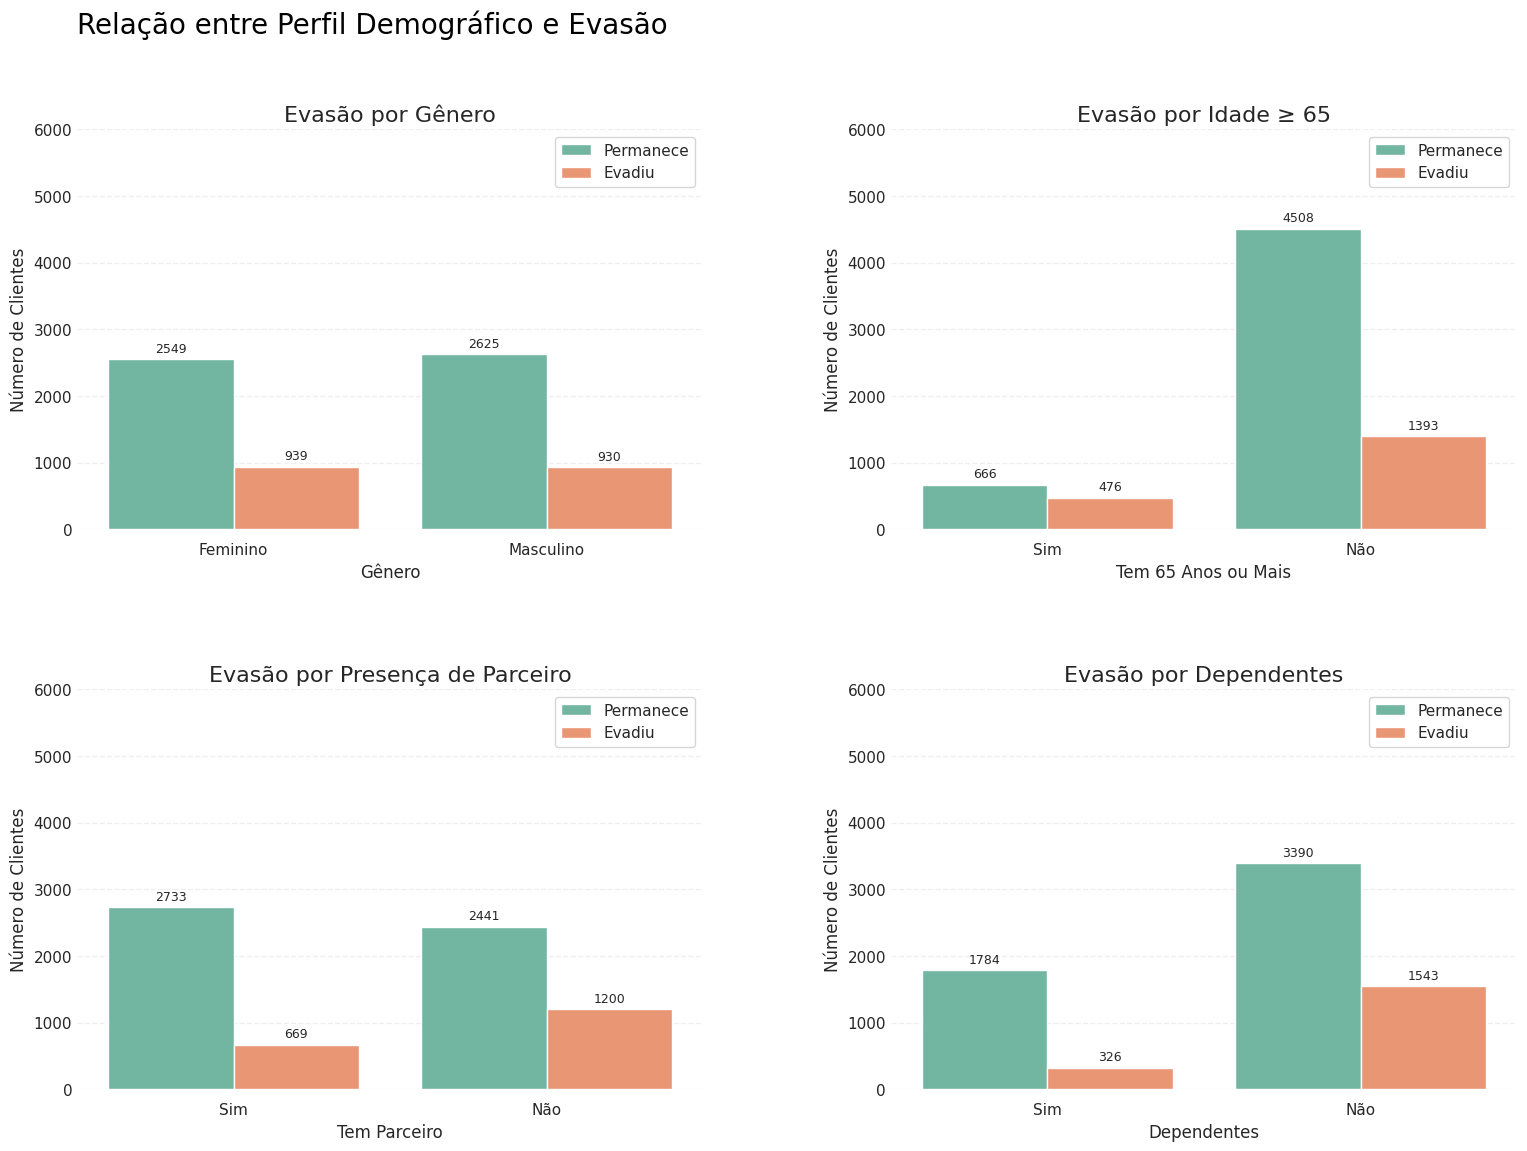

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converter valores booleanos para rótulos legíveis
df_traduzido['Tem65AnosOuMais'] = df_traduzido['Tem65AnosOuMais'].map({1: 'Sim', 0: 'Não'})

# Paleta personalizada
cores = ['#66c2a5', '#fc8d62']

# Criar figura e eixos com controle de layout
fig, axes = plt.subplots(
    2, 2, figsize=(16, 12),
    gridspec_kw={
        'left': 0.08, 'right': 0.98,
        'top': 0.88, 'bottom': 0.08,
        'hspace': 0.4, 'wspace': 0.3
    }
)

# Título principal alinhado à esquerda
fig.suptitle(
    'Relação entre Perfil Demográfico e Evasão',
    fontsize=20,
    x=0.08,  # alinhado com a primeira coluna
    ha='left',
    color='black'
)

# Alinhar rótulos dos eixos
fig.align_labels()

# Padronizar os eixos Y e estilo visual
for ax in axes.flat:
    ax.set_ylim(0, 6000)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_tick_params(length=0)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

# Função para adicionar rótulos nas barras
def adicionar_rotulos(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

# Gráfico 1: Gênero
sns.countplot(data=df_traduzido, x='Gênero', hue='Churn', palette=cores, ax=axes[0, 0])
axes[0, 0].set_title('Evasão por Gênero', fontsize=16)
axes[0, 0].set_xlabel('Gênero')
axes[0, 0].set_ylabel('Número de Clientes')
axes[0, 0].legend(['Permanece', 'Evadiu'])
adicionar_rotulos(axes[0, 0])

# Gráfico 2: Tem65AnosOuMais
sns.countplot(data=df_traduzido, x='Tem65AnosOuMais', hue='Churn', palette=cores, ax=axes[0, 1], order=['Sim', 'Não'])
axes[0, 1].set_title('Evasão por Idade ≥ 65', fontsize=16)
axes[0, 1].set_xlabel('Tem 65 Anos ou Mais')
axes[0, 1].set_ylabel('Número de Clientes')
axes[0, 1].legend(['Permanece', 'Evadiu'])
adicionar_rotulos(axes[0, 1])

# Gráfico 3: TemParceiro
sns.countplot(data=df_traduzido, x='TemParceiro', hue='Churn', palette=cores, ax=axes[1, 0])
axes[1, 0].set_title('Evasão por Presença de Parceiro', fontsize=16)
axes[1, 0].set_xlabel('Tem Parceiro')
axes[1, 0].set_ylabel('Número de Clientes')
axes[1, 0].legend(['Permanece', 'Evadiu'])
adicionar_rotulos(axes[1, 0])

# Gráfico 4: Dependentes
sns.countplot(data=df_traduzido, x='Dependentes', hue='Churn', palette=cores, ax=axes[1, 1])
axes[1, 1].set_title('Evasão por Dependentes', fontsize=16)
axes[1, 1].set_xlabel('Dependentes')
axes[1, 1].set_ylabel('Número de Clientes')
axes[1, 1].legend(['Permanece', 'Evadiu'])
adicionar_rotulos(axes[1, 1])

# Mostrar e salvar
plt.show()
fig.savefig('perfil_demografico.png', dpi=300, bbox_inches='tight')

In [39]:
#Salvando a figura
fig.savefig('perfil_demografico.png', dpi=300, bbox_inches='tight')


###Evasão por tipo de contrato

/tmp/ipython-input-2395608216.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)


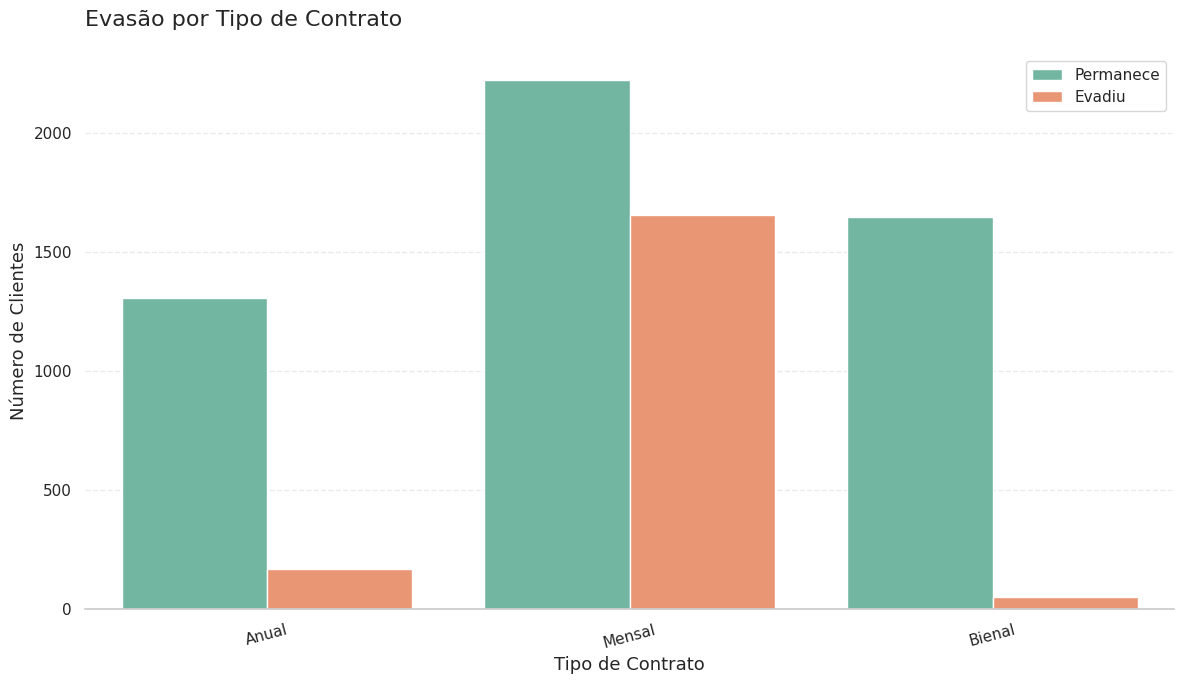

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo e figura
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))

# Gráfico
sns.countplot(
    data=df_traduzido,
    x='TipoContrato',
    hue='Churn',
    palette=['#66c2a5', '#fc8d62'],
    ax=ax
)

# Título e eixos
ax.set_title('Evasão por Tipo de Contrato', fontsize=16, loc='left', pad=20)
ax.set_xlabel('Tipo de Contrato', fontsize=13)
ax.set_ylabel('Número de Clientes', fontsize=13)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

# Remover bordas e adicionar linhas tracejadas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Ajustar legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Permanece', 'Evadiu'], title=None, loc='upper right')

# Layout ajustado
plt.tight_layout()
plt.show()

In [41]:
#Salvando a figura
fig.savefig('Evasao_tipocontrato.png', dpi=300, bbox_inches='tight')

In [42]:
# Agrupar por MesesContrato e Churn
df_agrupado = df_traduzido.groupby(['MesesContrato', 'Churn']).size().unstack(fill_value=0)

# Calcular a porcentagem de evasão (clientes que 'Saiu')
df_agrupado['porcentagem_evasão'] = (df_agrupado['Saiu'] / df_agrupado.sum(axis=1)) * 100

# Mostrar o resultado
print(df_agrupado[['porcentagem_evasão']])

Churn          porcentagem_evasão
MesesContrato                    
0                        0.000000
1                       61.990212
2                       51.680672
3                       47.000000
4                       47.159091
...                           ...
68                       9.000000
69                       8.421053
70                       9.243697
71                       3.529412
72                       1.657459

[73 rows x 1 columns]


In [48]:
import plotly.express as px

# Criar o gráfico de linha
fig = px.line(
    df_agrupado.reset_index(),
    x='MesesContrato',
    y='porcentagem_evasão',
    markers=True,
    title='Taxa de Evasão (%) por Tempo de Contrato'
)

# Refinar layout geral
fig.update_layout(
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis_title='Tempo de Contrato (Meses)',
    yaxis_title='Taxa de Evasão (%)',
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),
    yaxis=dict(ticksuffix='%', range=[0, df_agrupado['porcentagem_evasão'].max() + 5]),
    plot_bgcolor='white',
    hovermode='x unified',
    margin=dict(l=40, r=40, t=60, b=40)
)

# Adicionar linha de referência (média de evasão)
media_evasao = df_agrupado['porcentagem_evasão'].mean()
fig.add_hline(
    y=media_evasao,
    line_dash='dot',
    line_color='red',
    annotation_text=f'Média: {media_evasao:.2f}%',
    annotation_position='top left'
)

# Aplicar cores personalizadas
fig.update_traces(
    line=dict(color='#66c2a5', width=3),       # Verde para a linha
    marker=dict(size=6, color='#fc8d62', symbol='circle')  # Laranja para os pontos
)

# Mostrar o gráfico
fig.show()

In [49]:
fig.write_html("tempo_contrato.html")


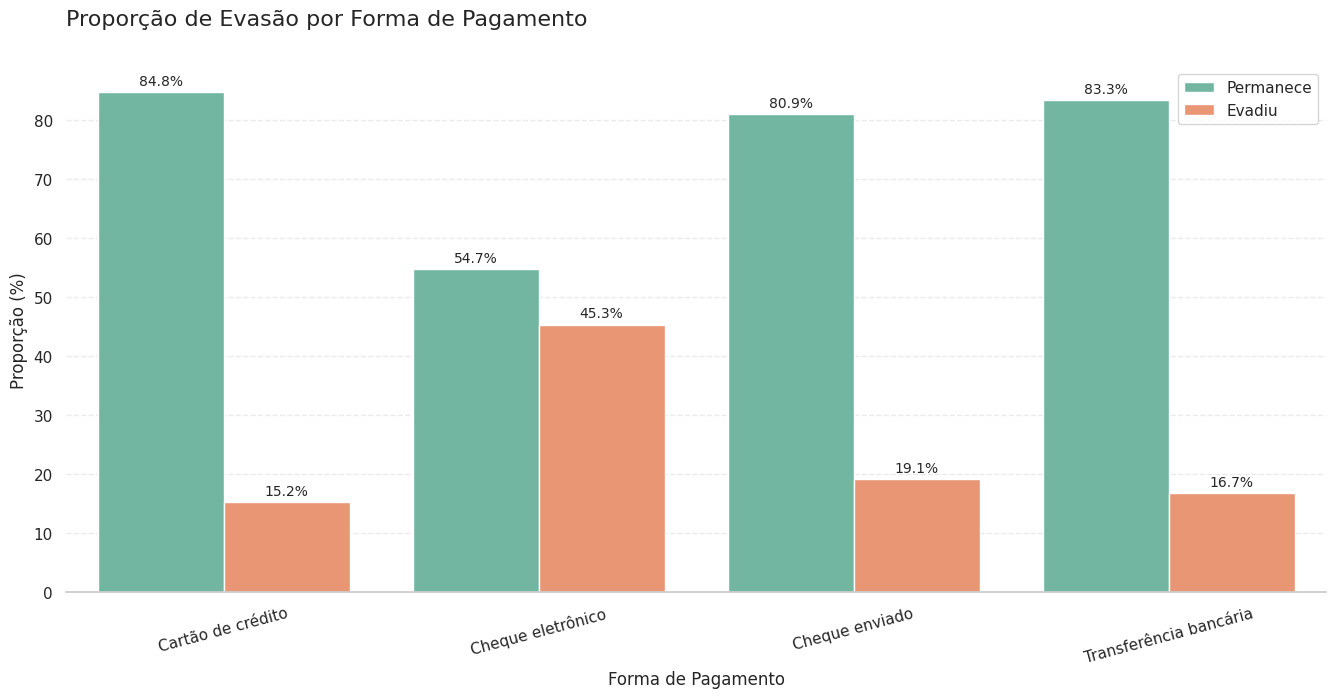

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Etapa 1: Calcular contagem de clientes por forma de pagamento e churn
contagem = df_traduzido.groupby(['FormaPagamento', 'Churn']).size().unstack(fill_value=0)

# Etapa 2: Calcular proporção de churn por forma de pagamento
proporcao = contagem.div(contagem.sum(axis=1), axis=0) * 100

# Etapa 3: Transformar em formato longo para plotagem
df_percentual = proporcao.reset_index().melt(id_vars='FormaPagamento', var_name='Churn', value_name='Proporcao')

# Etapa 4: Criar o gráfico
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(
    data=df_percentual,
    x='FormaPagamento',
    y='Proporcao',
    hue='Churn',
    palette=['#66c2a5', '#fc8d62'],
    ax=ax
)

# Etapa 5: Adicionar rótulos de porcentagem nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3)

# Etapa 6: Melhorar o layout visual
ax.set_title('Proporção de Evasão por Forma de Pagamento', fontsize=16, loc='left', pad=30)  # alinhado à esquerda
ax.set_xlabel('Forma de Pagamento', fontsize=12)
ax.set_ylabel('Proporção (%)', fontsize=12)
ax.tick_params(axis='x', rotation=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adicionar linhas horizontais tracejadas
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Ajustar legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Permanece', 'Evadiu'], title=None, loc='upper right')

# Ajustar margens
plt.subplots_adjust(left=0.08, right=0.98, top=0.90, bottom=0.15)

plt.show()

In [47]:
#Salvando a figura
fig.savefig('Proporcaoevasao_formapagamento.png', dpi=300, bbox_inches='tight')

#📄Relatorio Final -Telecom X

##**Introdução**:

###📌 Introdução
###Este relatório apresenta a análise exploratória realizada no contexto do desafio proposto pela Telecom X, uma empresa de serviços de telecomunicação que enfrenta um elevado índice de cancelamentos de clientes — o chamado churn. A evasão representa clientes que encerram seus contratos, impactando diretamente a receita e a sustentabilidade do negócio.
###O objetivo deste desafio foi investigar os fatores que influenciam o churn, utilizando técnicas de análise de dados com Python e suas principais bibliotecas. A partir dos insights gerados, a equipe de Data Science poderá avançar para a construção de modelos preditivos e desenvolver estratégias eficazes para reduzir a perda de clientes.



##🧹 Limpeza e Tratamento de Dados
###Para garantir a qualidade e confiabilidade da análise, foram realizados os seguintes passos:
###Importação dos dados via API disponibilizada pela Telecom X

*   Importação dos dados via API disponibilizada pela Telecom X
*   Tradução de variáveis para facilitar a leitura (ex: SeniorCitizen → Tem65AnosOuMais)
*   Conversão de tipos de dados, como datas, valores numéricos e variáveis categóricas
*   Criação de faixas para variáveis contínuas (ex: idade, tempo de contrato)

*   Tratamento de valores nulos e inconsistências para evitar distorções nos resultados

###Essas etapas asseguraram que os dados estivessem prontos para análise e visualização, permitindo uma interpretação mais precisa e eficaz.


##Análise Exploratória de Dados


###📊 Análise Exploratória de Dados
###👥 Figura 1 – Perfil Demográfico e Evasão
###A análise mostra que:


*   Clientes com parceiro e dependentes tendem a permanecer mais tempo
*   Indivíduos com 65 anos ou mais apresentam maior propensão à evasão.
*   O gênero não demonstra influência estatística relevante sobre o comportamento de retenção.

###Esses achados indicam que estratégias de retenção devem ser direcionadas especialmente aos clientes mais idosos e àqueles sem vínculos familiares, com ações personalizadas de suporte e benefícios.
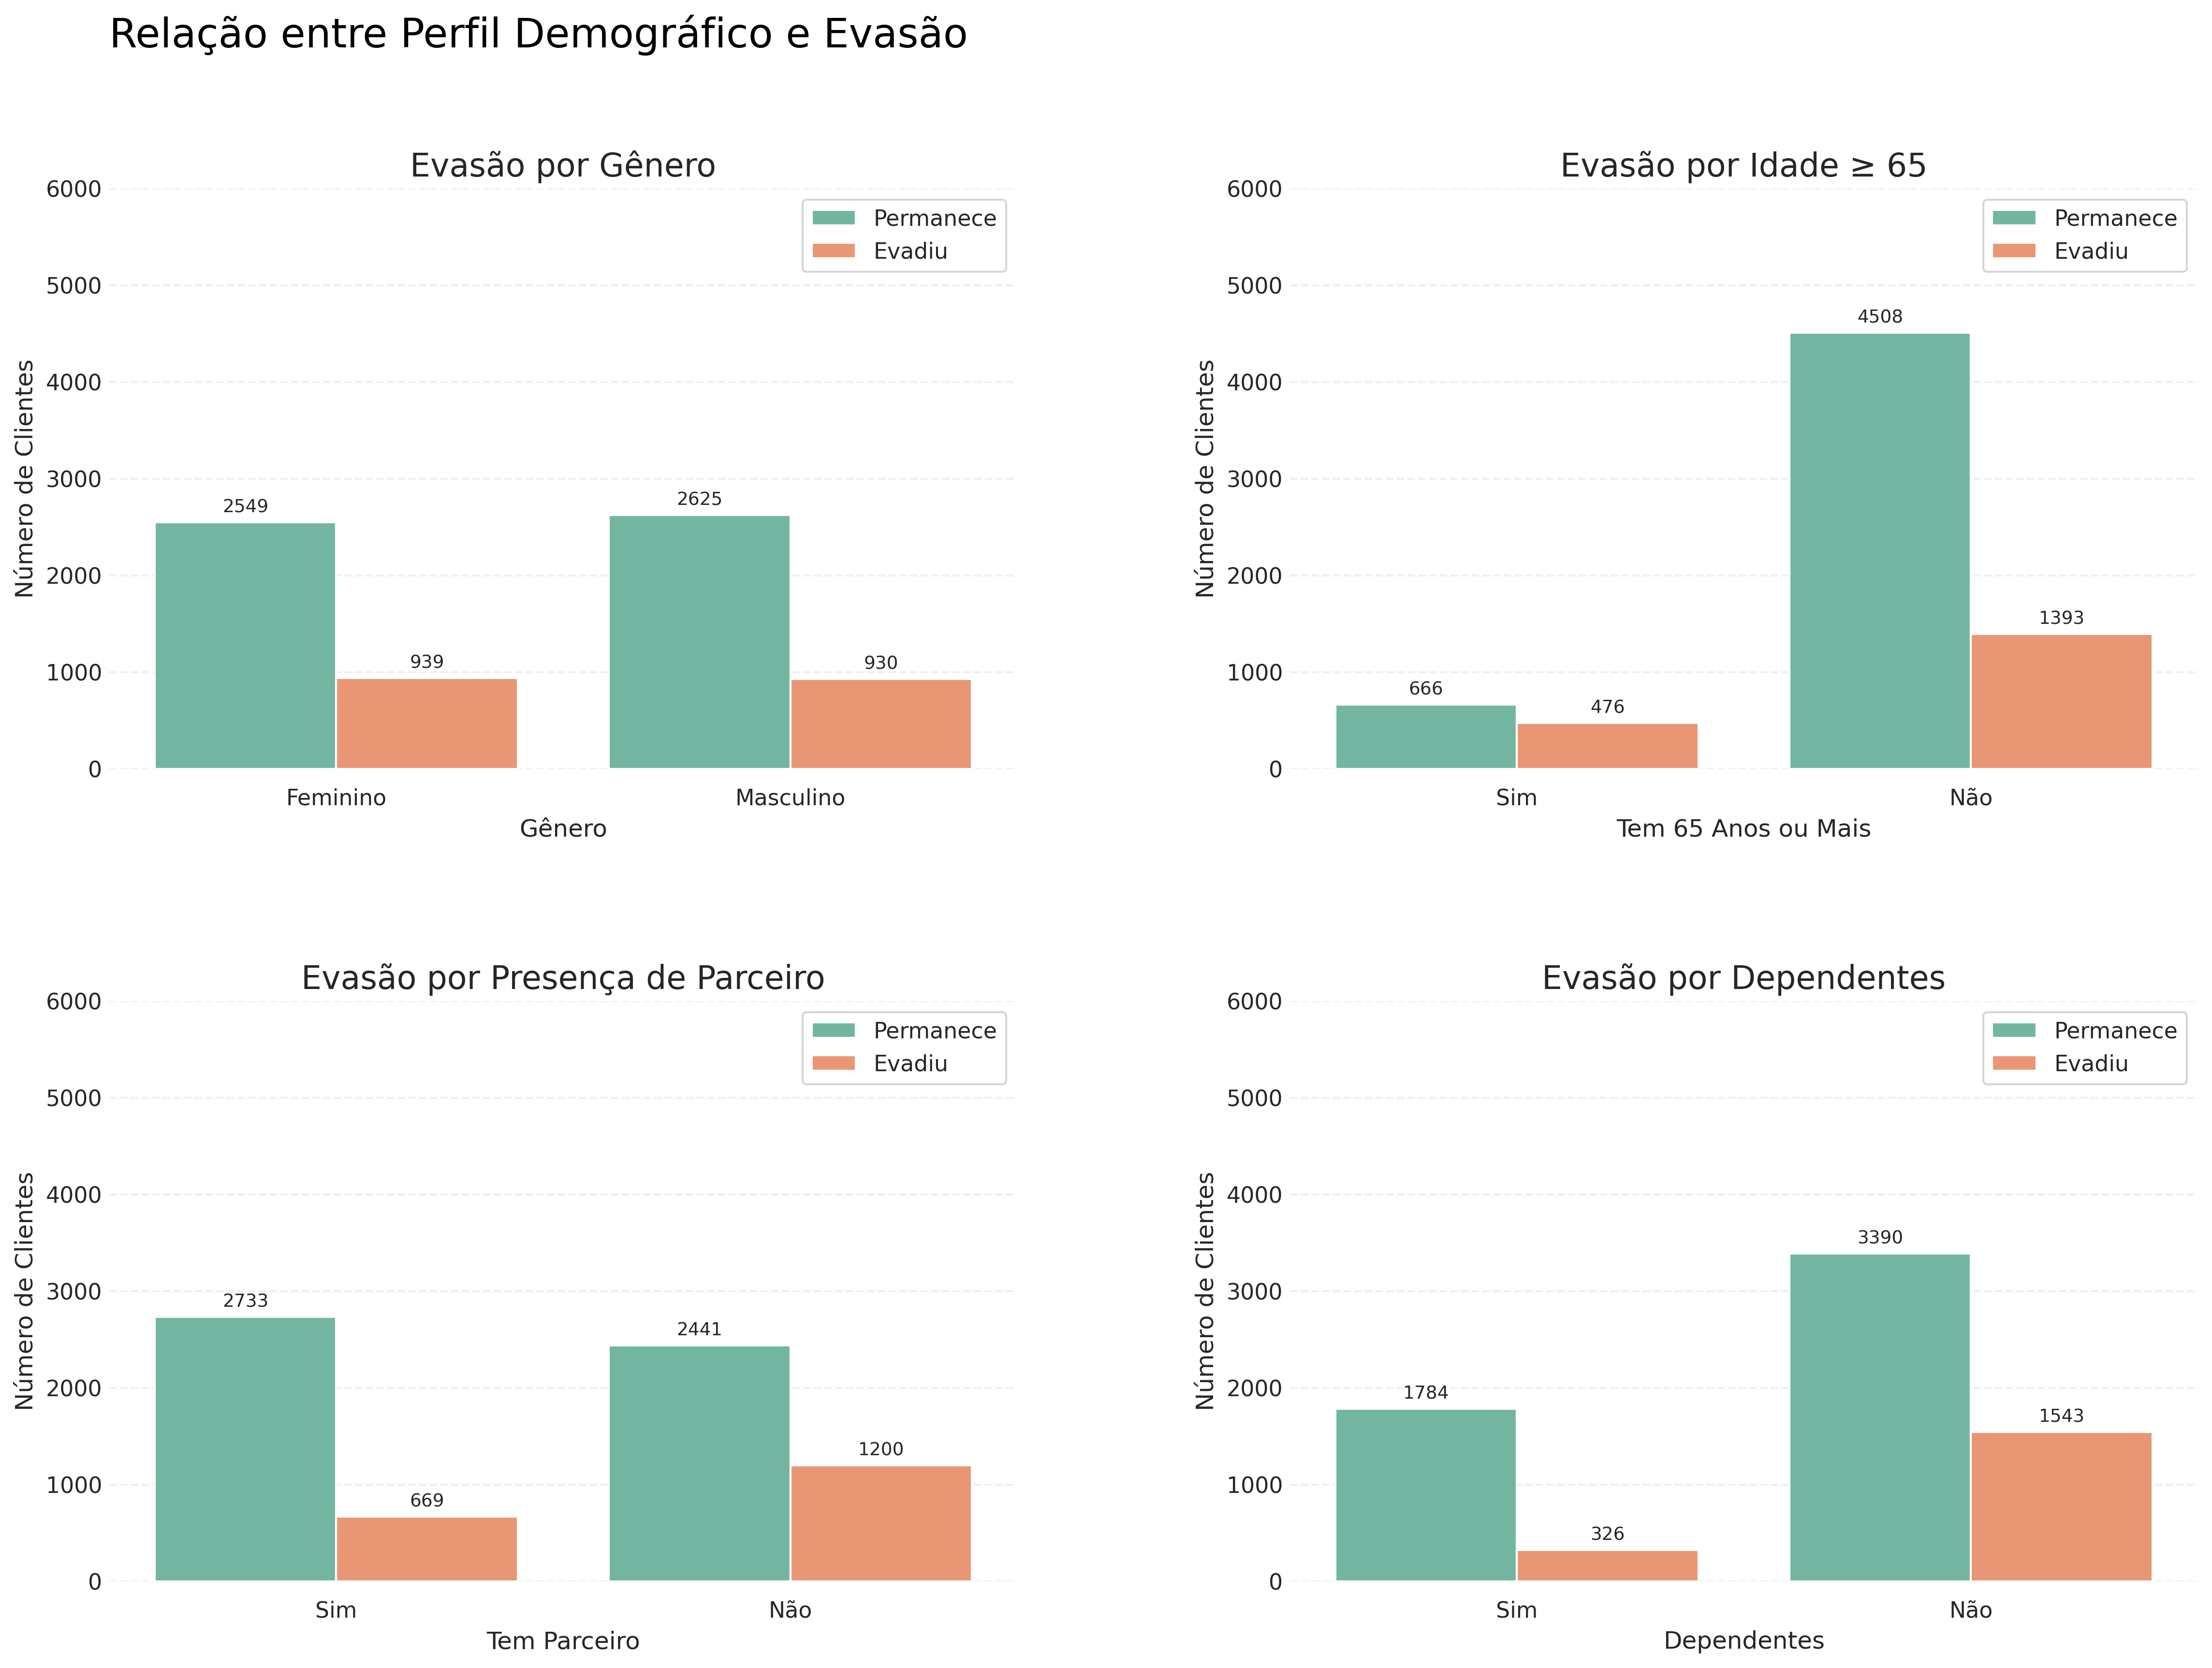

### 📄 Figura 2 – Evasão por Tipo de Contrato
- Contratos Anual e Bienal apresentam maior permanência.
- Contratos Mensais têm distribuição quase equilibrada entre permanência e evasão.

###Isso sugere que contratos mais longos estão associados a maior fidelização, enquanto contratos mensais atraem perfis com menor comprometimento.


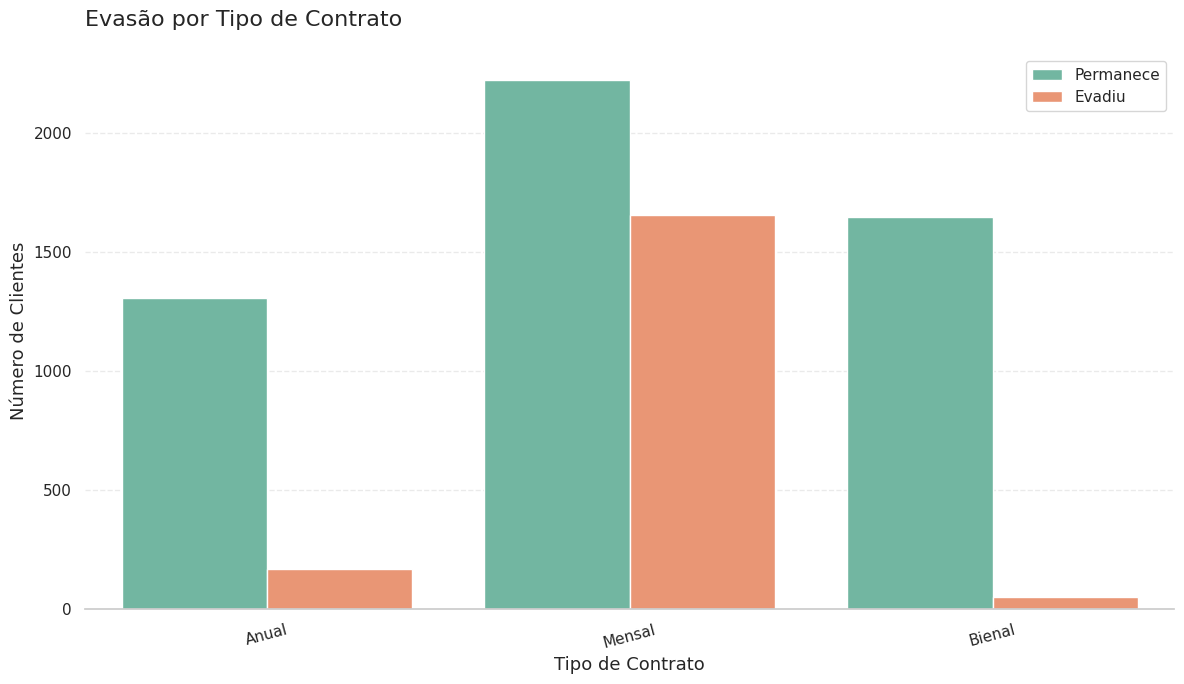

###📈 Figura 3 – Evasão por Tempo de Contrato
*   A taxa de evasão é mais alta nos primeiros meses, especialmente no primeiro mês.
*   A partir do 12º mês, a taxa começa a se estabilizar abaixo da média geral de 22,01%.

###Esse padrão reforça a importância de ações de retenção nos primeiros meses de contrato.

In [ ]:
import plotly.express as px

# Criar o gráfico de linha
fig = px.line(
    df_agrupado.reset_index(),
    x='MesesContrato',
    y='porcentagem_evasão',
    markers=True,
    title='Taxa de Evasão (%) por Tempo de Contrato'
)

# Refinar layout geral
fig.update_layout(
    title_font=dict(size=22, family='Arial', color='black'),
    xaxis_title='Tempo de Contrato (Meses)',
    yaxis_title='Taxa de Evasão (%)',
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),
    yaxis=dict(ticksuffix='%', range=[0, df_agrupado['porcentagem_evasão'].max() + 5]),
    plot_bgcolor='white',
    hovermode='x unified',
    margin=dict(l=40, r=40, t=60, b=40)
)

# Adicionar linha de referência (média de evasão)
media_evasao = df_agrupado['porcentagem_evasão'].mean()
fig.add_hline(
    y=media_evasao,
    line_dash='dot',
    line_color='red',
    annotation_text=f'Média: {media_evasao:.2f}%',
    annotation_position='top left'
)

# Aplicar cores personalizadas
fig.update_traces(
    line=dict(color='#66c2a5', width=3),       # Verde para a linha
    marker=dict(size=6, color='#fc8d62', symbol='circle')  # Laranja para os pontos
)

# Mostrar o gráfico
fig.show()

###📊Figura 4 - Proporção de Evasão por Forma de Pagamento

*   Cartão de crédito, transferência bancária e cheque enviado têm taxas depermanência acima de 80%, indicando que clientes que usam essas formas de pagamento tendem a ser mais fiéis.
*   Já o cheque eletrônico apresenta uma taxa de evasão altíssima (45.3%), quase metade dos clientes que usam essa forma de pagamento cancelam o serviço.Nesse caso , O cheque eletrônico pode estar associado a perfis de clientes menos engajados ou com menor acesso a métodos automáticos.



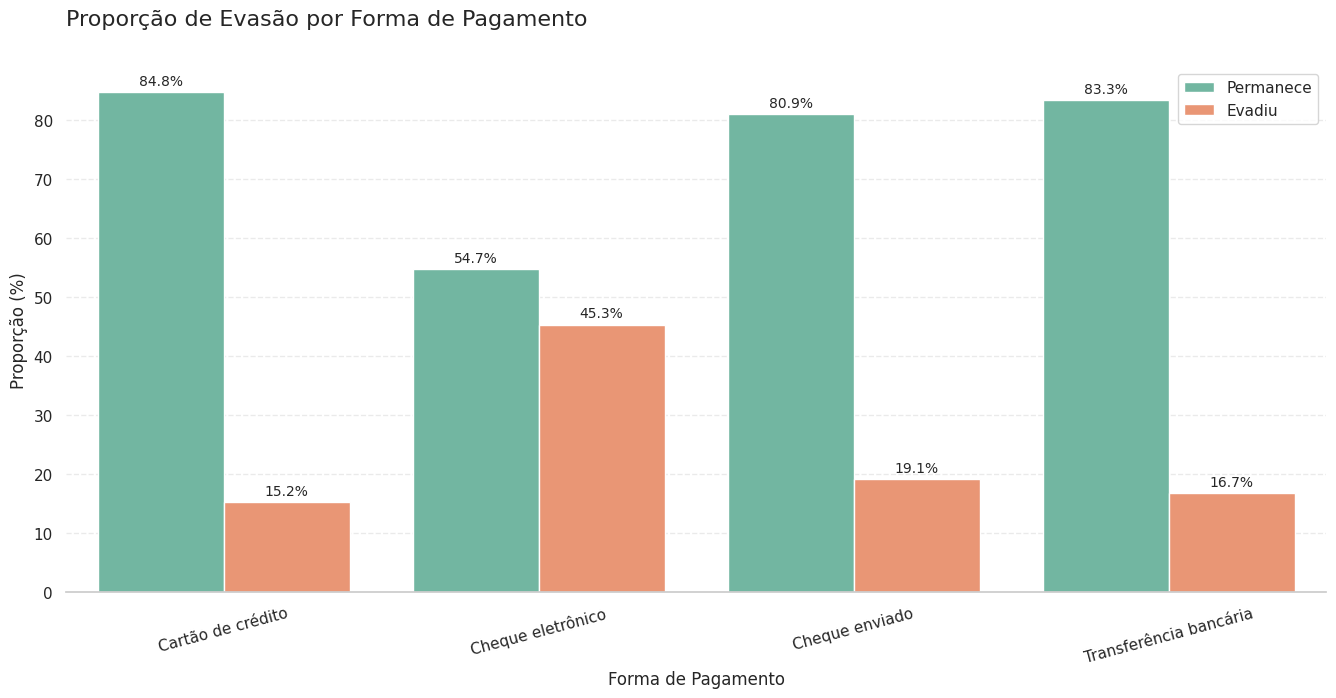

###✅ Conclusões e Insights

1. Contratos mensais têm maior churn — sugerem menor fidelização.
2. Pagamentos por boleto estão associados à evasão — podem indicar menor engajamento.
3. Cobranças baixas estão ligadas a churn — talvez clientes com menor valor não percebam tanto benefício.
4. Contratos curtos (até 12 meses) concentram a maior parte da evasão.
Esses padrões ajudam a entender o perfil dos clientes que mais evadem e onde estão os pontos críticos.
5. Formas de pagamento automáticas, como cartão de crédito e transferência bancária, parecem favorecer a retenção — talvez por comodidade ou menor esforço do cliente.


###💡 Recomendações
###Com base na análise, sugerimos:
- Incentivar contratos mais longos, com benefícios progressivos.
- Oferecer planos personalizados para clientes de baixo valor, aumentando a percepção de benefício.
- Monitorar clientes nos primeiros meses com ações de retenção específicas
- Incentivar o uso de cartão de crédito ou débito automático, oferecendo benefícios ou descontos e investigar se há barreiras técnicas ou operacionais que afetam o uso de cheque eletrônico.
